<a href="https://colab.research.google.com/github/ImperB-riven/DRAFT/blob/main/xlsltk_decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/ImperB-riven/DRAFT/main/learn.csv")
df.shape

(14, 5)

In [16]:
df = df.drop('id', 1)
df.head()

,learn,focus,relax,result
0,Little,Yes,No,Pass
1,Much,Yes,Yes,Pass
2,Normal,No,No,Fail
3,Little,Yes,Yes,Pass
4,Normal,No,Yes,Fail


In [17]:
X = df.drop(['result'], axis=1)

y = df['result']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((9, 3), (5, 3))

In [19]:
!pip install category_encoders

In [20]:
#convert các feature từ string sang int
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['learn', 'focus', 'relax'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
#check type 
X_train.dtypes

learn    int64
focus    int64
relax    int64
dtype: object

In [22]:
X_test.head()


,learn,focus,relax
9,3,1,1
11,1,1,1
0,3,2,2
12,2,2,1
5,2,2,2


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0, max_features=None) 
#max_feature=None nghĩa lấy hết các features
#max_depth là độ sâu của cây 
#criterion là chọn phương pháp để đánh giá khi phân chia nhánh, trong lý thuyết mình chỉ được học entropy 

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

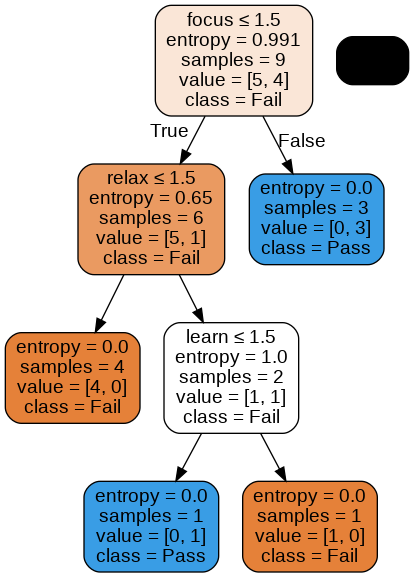

In [24]:
#Vẽ thử cây ra
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [26]:
clf.score(X_test, y_test)

1.0

In [27]:
y_pred_train_gini = clf.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(clf.score(X_train,y_train)))

Training-set accuracy score: 1.0000
